### 1. Load_digits

In [1]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

'''
data: Bunch
Dictionary-like object, with the following attributes.

data: {ndarray, dataframe} of shape (1797, 64)
The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.

target: {ndarray, Series} of shape (1797,)
The classification target. If as_frame=True, target will be a pandas Series.

feature_names: list
The names of the dataset columns.

target_names: list
The names of target classes.

New in version 0.20.

frame: DataFrame of shape (1797, 65)
Only present when as_frame=True. DataFrame with data and target.

New in version 0.23.

images: {ndarray} of shape (1797, 8, 8)
The raw image data.

DESCR: str
The full description of the dataset.

'''

(1797, 64) (1797,) [0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the nu

<Figure size 432x288 with 0 Axes>

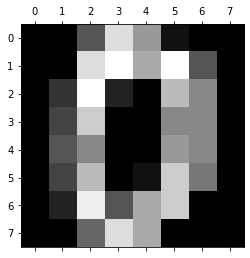

In [2]:
# load dataset & display 
digits = load_digits()
data = digits.data
label = digits.target
names = digits.target_names
print(data.shape, label.shape, names)
print(digits.DESCR)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [3]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   label, 
                                                   test_size = 0.2,
                                                   random_state = 1)

In [4]:
#DecisionTree fit & predict
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.97      0.80      0.88        35
           2       0.91      0.86      0.89        36
           3       0.84      0.78      0.81        41
           4       0.86      0.95      0.90        38
           5       0.81      0.97      0.88        30
           6       0.95      1.00      0.97        37
           7       0.83      0.81      0.82        37
           8       0.84      0.90      0.87        29
           9       0.77      0.79      0.78        34

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.88      0.88      0.88       360



In [5]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.92      0.97      0.94        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [6]:
#SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [7]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      0.91      0.96        35
           2       1.00      0.94      0.97        36
           3       0.98      0.98      0.98        41
           4       0.97      0.97      0.97        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.95      0.97      0.96        37
           8       0.83      1.00      0.91        29
           9       0.91      0.88      0.90        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [8]:
#Logistic regression
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



'''digits를 분류하는 문제에 있어서는 positive 와 negative의 경계가 분명하지 않고 불균

형 데이터일 경우의 문제점을 이미 우리가 파악하였다 따라서 맞았는데 틀렸다고 하는 지수가 높지 

않아야 한다고 생각한다. Precision이 적합할 것 같다.'''

### 2. Load_wine

In [9]:
wine = load_wine()
data = wine.data
label = wine.target
names = wine.target_names
print(names)
print(wine.DESCR)
print(data[0], label[0])

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

In [10]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   label, 
                                                   test_size = 0.2,
                                                   random_state = 1)

In [11]:
#DecisionTree fit & predict
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.75      0.92      0.83        13
           2       1.00      0.67      0.80         9

    accuracy                           0.86        36
   macro avg       0.89      0.84      0.85        36
weighted avg       0.88      0.86      0.86        36

[[13  1  0]
 [ 1 12  0]
 [ 0  3  6]]


In [12]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]


In [13]:
#SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.58      0.85      0.69        13
           2       0.20      0.11      0.14         9

    accuracy                           0.64        36
   macro avg       0.57      0.58      0.56        36
weighted avg       0.62      0.64      0.61        36

[[11  0  3]
 [ 1 11  1]
 [ 0  8  1]]


In [14]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.83      0.38      0.53        13
           2       0.44      0.44      0.44         9

    accuracy                           0.64        36
   macro avg       0.65      0.61      0.59        36
weighted avg       0.67      0.64      0.61        36

[[14  0  0]
 [ 3  5  5]
 [ 4  1  4]]


In [15]:
#Logistic regression
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]


'''
와인의 등급을 분류하는 문제이고 아마 등급이 높은 것을 낮게 측정하는 것처럼 오류가 나게 되면 

회사의 경제적 측면에서 더 안좋을 것 같다는 생각이 들었습니다. 그래서 저는 recall 점수를 

선택하여 사용할 것 같습니다.
'''

### 3. Load_breast_cancer

In [16]:
bcancer = load_breast_cancer()
data = bcancer.data
label = bcancer.target
names = bcancer.target_names
print(names)
print(bcancer.DESCR)

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instanc

In [17]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   label, 
                                                   test_size = 0.2,
                                                   random_state = 1)

In [18]:
#DecisionTree fit & predict
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  3]
 [ 2 70]]


In [19]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

[[37  5]
 [ 0 72]]


In [20]:
#SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114

[[31 11]
 [ 0 72]]


In [21]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        42
           1       1.00      0.60      0.75        72

    accuracy                           0.75       114
   macro avg       0.80      0.80      0.75       114
weighted avg       0.85      0.75      0.75       114

[[42  0]
 [29 43]]


In [22]:
#Logistic regression
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[40  2]
 [ 1 71]]


'''
이 문제에 관해서는 실제 건강한 사람을 암이라고 판단하는 허용치가 높게 책정이 되더라도

한명의 암환자를 찾아내는 것이 더 중요한 목적을 가지고 있기 때문에 recall을 선택하여야 한다.
'''